LAB 5 : LOGISTIC REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model as im
from pandas import read_csv
import warnings

In [2]:
from google.colab import files
a = files.upload()

Saving data1.csv to data1.csv


### 1.

In [3]:
data=read_csv("data1.csv")
data

,x1,x2,y
0,4.5192,2.6487,1
1,2.4443,1.5438,1
2,4.2409,1.8990,1
3,5.8097,2.4711,1
4,6.4423,3.3590,1
...,...,...,...
95,5.9868,7.3641,0
96,4.6711,6.2592,0
97,7.5810,8.3703,0
98,4.6457,8.5676,0


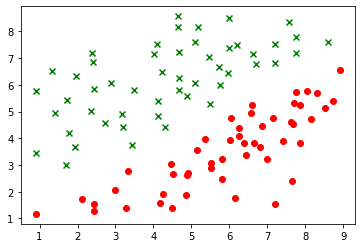

In [4]:
class1=data[data['y']==1]
class2=data[data['y']==0]
plt.scatter(class1['x1'],class1['x2'],c='red',marker='o')
plt.scatter(class2['x1'],class2['x2'],c='green',marker='x')

### 2.

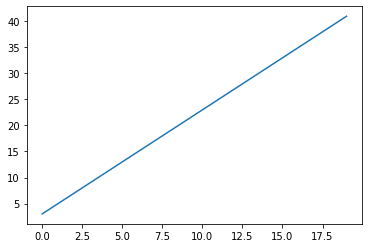

In [5]:
x=np.arange(0,20,1)
y=2*x + 3
plt.plot(x,y)

### 3.

In [7]:
import math

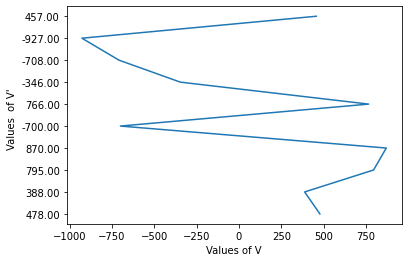

In [8]:
def sigmod(x):
    return 1/(1+ math.exp(-x))
x=[np.random.randint(-1000,1000) for _ in range(10)]
y=[format(ele,'.2f')  for ele in x]
plt.xlabel("Values of V")
plt.ylabel("Values  of V'  ") 
plt.plot(x,y)
plt.show()

### 4.

In [9]:
def hypothesis(theta,  X):
    if sigmoid(np.dot(theta,X))>0.5:
        return 0
    return 1


### 5.

In [11]:
def cost_function(theta,x,y):
    m=x.shape[0]
    total_cost=-(1/m)*np.sum(y*np.log(hypothesis(theta,x))-(1-y)*np.log(hypothesis(theta,1-x)))
    return total_cost

### 6.

In [14]:
b=files.upload()

Saving loan_data.csv to loan_data.csv


In [15]:
df1= read_csv("loan_data.csv")
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df1['Gender'][df1['Gender'].isnull()]='Male'
df1['Married'][df1['Married'].isnull()]=  'Yes'
df1['LoanAmount'][df1['LoanAmount'].isnull()]= df1['LoanAmount'].mean() 
df1['Loan_Amount_Term'][df1['Loan_Amount_Term'].isnull()] =  '360'
df1['Self_Employed'][df1['Self_Employed'].isnull()]=  'No'
df1['Credit_History'][df1['Credit_History'].isnull()]=  '1'
df1['Dependents'][df1['Dependents'].isnull()]=  '0'


<ipython-input-18-b3570ed308b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Gender'][df1['Gender'].isnull()]='Male'
<ipython-input-18-b3570ed308b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Married'][df1['Married'].isnull()]=  'Yes'
<ipython-input-18-b3570ed308b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LoanAmount'][df1['LoanAmount'].isnull()]= df1['LoanAmount'].mean()
<ipython-input-18-b3570ed308b4>

In [19]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df1.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [21]:
df1.loc[df1.Dependents=='3+',   'Dependents']=4
df1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [22]:
df1.loc[df1.Loan_Status=='N', 'Loan_Status']=0
df1.loc[df1.Loan_Status=='Y', 'Loan_Status']=1
df1.loc[df1.Gender=='Male',   'Gender']=0
df1.loc[df1.Gender=='Female',   'Gender']=1
df1.loc[df1.Education=='Graduate',   'Education']=0
df1.loc[df1.Education=='Not Graduate',   'Education']=1
df1.loc[df1.Married=='No', 'Married']=0
df1.loc[df1.Married=='Yes',   'Married']=1
df1.loc[df1.Self_Employed=='No', 'Self_Employed']=0
df1.loc[df1.Self_Employed=='Yes',  'Self_Employed']=1
df1.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [23]:
property_area = pd.get_dummies(df1['Property_Area'],drop_first=True) 
df1 = pd.concat([df1,property_area],axis=1)
df1.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Semiurban,Urban
0,LP001002,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,1,0,1
1,LP001003,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,0,0,0
2,LP001005,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,1,0,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,1,0,1
4,LP001008,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,1,0,1


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    object 
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Semiurban          614 non-null    uint8  
 14  Urban              614 non-null    uint8  
dtypes: float64(2), int64(1), object(10), uint8(2)
memory usage: 63.7+ KB


### 7.

In [25]:
from sklearn  import preprocessing
from sklearn.model_selection  import train_test_split
from sklearn.linear_model  import  LogisticRegression
from sklearn  import metrics


In [26]:
X= df1.drop(['Loan_ID','Property_Area', 'Loan_Status'],axis=1)
y= df1['Loan_Status'].astype('int')
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=None)


In [27]:
normalizer= preprocessing.Normalizer().fit(X)
regressor=  LogisticRegression()
df1.columns
regressor.fit(X_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
preds=regressor.predict(X_test)
print(f"Evaluation Score= {round(regressor.score(X,y),3)*100}%")

Evaluation Score= 81.39999999999999%


### 8.

In [29]:
from sklearn.metrics  import classification_report
from sklearn.metrics  import  confusion_matrix
from sklearn.metrics import  roc_curve
from sklearn.metrics import  roc_auc_score


In [30]:
confusion_matrix(y_test,preds)

array([[22, 22],
       [ 0, 79]])

### 9.

In [31]:
a,  b,  c,  d=15,18,3,87
print(f"Accuracy={round((a+d)/(a+b+c+d)*100,3)}%")


Accuracy=82.927%


### 10.

In [32]:
print(classification_report(y_test,  preds))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        44
           1       0.78      1.00      0.88        79

    accuracy                           0.82       123
   macro avg       0.89      0.75      0.77       123
weighted avg       0.86      0.82      0.80       123



### 11.

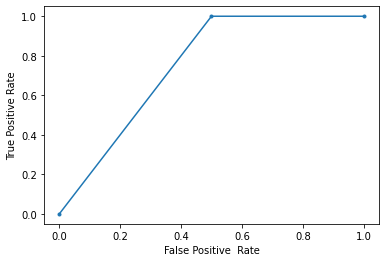

In [33]:
fp,  tp,  thresholds =  roc_curve(y_test,  preds)
plt.plot(fp,  tp,  marker='.',  label='Logistic')
plt.xlabel('False Positive  Rate')
plt.ylabel('True Positive Rate') 
plt.show()
